In [3]:
#import required libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest, proportion_confint

In [4]:

#read in data
happiness_df = pd.read_csv(r'C:\Users\14422\Desktop\Data Prep and Analysis\Data for Python/Social Media and Mental Health.csv')


In [5]:
#validate max and mins to check for outliers 
happiness_df.describe()

,Age,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Happiness_Index(1-10)
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,32.988000,5.530000,6.304000,6.618000,3.134000,2.448000,8.376000
std,9.960637,1.734877,1.529792,1.542996,1.858751,1.428067,1.524228
min,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,4.000000
25%,24.000000,4.300000,5.000000,6.000000,2.000000,1.000000,7.000000
50%,34.000000,5.600000,6.000000,7.000000,3.000000,2.000000,9.000000
75%,41.000000,6.700000,7.000000,8.000000,5.000000,3.000000,10.000000
max,49.000000,10.800000,10.000000,10.000000,9.000000,7.000000,10.000000


In [6]:
#check data types
happiness_df.dtypes

User_ID                       object
Age                            int64
Gender                        object
Daily_Screen_Time(hrs)       float64
Sleep_Quality(1-10)            int64
Stress_Level(1-10)             int64
Days_Without_Social_Media      int64
Exercise_Frequency(week)       int64
Social_Media_Platform         object
Happiness_Index(1-10)          int64
dtype: object

In [7]:
#check completness
happiness_df.isnull().sum()

User_ID                      0
Age                          0
Gender                       0
Daily_Screen_Time(hrs)       0
Sleep_Quality(1-10)          0
Stress_Level(1-10)           0
Days_Without_Social_Media    0
Exercise_Frequency(week)     0
Social_Media_Platform        0
Happiness_Index(1-10)        0
dtype: int64

In [8]:
#double chekc
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   User_ID                    500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Gender                     500 non-null    object 
 3   Daily_Screen_Time(hrs)     500 non-null    float64
 4   Sleep_Quality(1-10)        500 non-null    int64  
 5   Stress_Level(1-10)         500 non-null    int64  
 6   Days_Without_Social_Media  500 non-null    int64  
 7   Exercise_Frequency(week)   500 non-null    int64  
 8   Social_Media_Platform      500 non-null    object 
 9   Happiness_Index(1-10)      500 non-null    int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 39.2+ KB


In [9]:
#normalize data
for col in happiness_df.select_dtypes(include = 'object').columns:
    happiness_df[col] = happiness_df[col].str.lower()

In [10]:
#function to transfor data and create "Happiness" Score
def happiness(df):
    df['Happiness'] = np.where(df['Happiness_Index(1-10)'] >= 9, 'happy',
                        np.where((df['Happiness_Index(1-10)'] >= 7) & 
                                 (df['Happiness_Index(1-10)'] < 9), 'neutral',
                                 'unhappy'))
    return df


In [11]:
#create new dataframe with happiness ranking
update_df = happiness(happiness_df)

In [12]:
update_df

,User_ID,Age,Gender,Daily_Screen_Time(hrs),Sleep_Quality(1-10),Stress_Level(1-10),Days_Without_Social_Media,Exercise_Frequency(week),Social_Media_Platform,Happiness_Index(1-10),Happiness
0,u001,44,male,3.1,7,6,2,5,facebook,10,happy
1,u002,30,other,5.1,7,8,5,3,linkedin,10,happy
2,u003,23,other,7.4,6,7,1,3,youtube,6,unhappy
3,u004,36,female,5.7,7,8,1,1,tiktok,8,neutral
4,u005,34,female,7.0,4,7,5,1,x (twitter),8,neutral
...,...,...,...,...,...,...,...,...,...,...,...
495,u496,23,male,6.9,5,7,4,2,x (twitter),10,happy
496,u497,43,female,5.6,7,6,5,2,facebook,9,happy
497,u498,41,male,7.7,5,7,2,2,linkedin,8,neutral
498,u499,23,male,4.2,9,7,0,2,facebook,9,happy


In [13]:
#test statistic function 
def test_stat(df):
    men_happy = df[(df['Gender'] == 'male') & (df['Happiness'] == 'happy')].shape[0]
    men_unhappy = df[(df['Gender'] == 'male') & (df['Happiness'].isin(['neutral', 'unhappy']))].shape[0]
    other_happy = df[(df['Gender'].isin(['female', 'other'])) & (df['Happiness'] == 'happy')].shape[0]
    other_unhappy = df[(df['Gender'].isin(['female', 'other'])) & (df['Happiness'].isin(['neutral', 'unhappy']))].shape[0]
    men_frac = men_happy / men_unhappy if men_unhappy > 0 else 0
    other_frac = other_happy / other_unhappy if other_unhappy > 0 else 0
    test_statistic = men_frac - other_frac
    return test_statistic


In [14]:
#calculate observed statistic
observed_statistic = test_stat(update_df)
observed_statistic

-0.10000000000000009

In [15]:
#permutation test here
replicates = []
num_sim = 1000


for _ in range(num_sim) : 
    for_simulation = update_df.copy()
    shuffled = np.random.permutation(for_simulation['Gender'].values)
    for_simulation['Gender'] = shuffled
    test_statistic = test_stat(for_simulation)
    replicates.append (test_statistic)

In [16]:
#create a dataframe of the permutation
replicates_df = pd.DataFrame({'replicates':replicates})
replicates_df

,replicates
0,0.373948
1,-0.100000
2,0.305195
3,-0.133647
4,0.000806
...,...
995,0.034409
996,-0.032787
997,0.203033
998,0.169181


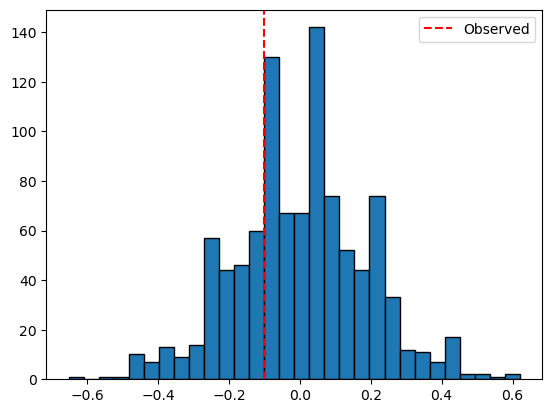

In [17]:
#graph permutation and observered stat
plt.hist(replicates_df['replicates'], bins=30, edgecolor='black')
plt.axvline(observed_statistic, color='red', linestyle='--', label='Observed')
plt.legend()
plt.show()


In [18]:
#code to get 1000 bootstrapped data examples and a 95% confidence interval

def bootstrap_ci(df, stat_func, n_boot=1000, ci=95):
    stats = []
    for _ in range(n_boot):
        sample = df.sample(frac=1, replace=True)  # resample with replacement
        stats.append(stat_func(sample))
    lower = np.percentile(stats, (100-ci)/2)
    upper = np.percentile(stats, 100 - (100-ci)/2)
    return lower, upper, stats


In [ ]:
#create objects 
five_percent, nintyfive_percent, boot_stats =  bootstrap_ci(update_df, test_stat)

np.float64(-0.4672878883283193)

In [ ]:
#create dataframe
boot_stats_df = pd.DataFrame({'replicates':boot_stats})
boot_stats_df

,replicates
0,0.377643
1,-0.345161
2,-0.054428
3,-0.047047
4,0.291613
...,...
995,0.096375
996,-0.132057
997,-0.016000
998,0.066232


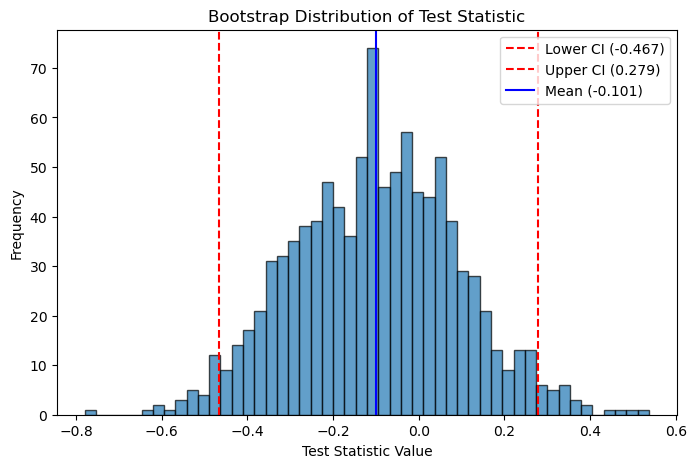

In [26]:
plt.figure(figsize=(8,5))
plt.hist(boot_stats, bins=50, edgecolor='k', alpha=0.7)
plt.axvline(five_percent, color='red', linestyle='--', label=f'Lower CI ({five_percent:.3f})')
plt.axvline(nintyfive_percent, color='red', linestyle='--', label=f'Upper CI ({nintyfive_percent:.3f})')
plt.axvline(np.mean(boot_stats), color='blue', linestyle='-', label=f'Mean ({np.mean(boot_stats):.3f})')

plt.title("Bootstrap Distribution of Test Statistic")
plt.xlabel("Test Statistic Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [31]:
#create function to identify median of "Happiness_Index (1-10)"
def happiness_median(df):
    men_data = df[df['Gender'] == 'male']['Happiness_Index(1-10)']
    other_data = df[df['Gender'].isin(['female', 'other'])]['Happiness_Index(1-10)']
    men_median = men_data.median()
    other_median = other_data.median()
    return men_median - other_median

In [32]:
#observed statistic
happiness_median(update_df)

-0.5

In [35]:
#bootstrap 
def bootstrap_median(df, stat_func, n_boot=1000, ci=95):
    median = []
    for _ in range(n_boot):
        sample = df.sample(frac=1, replace=True)  # resample with replacement
        median.append(stat_func(sample))
    lower = np.percentile(median, (100-ci)/2)
    upper = np.percentile(median, 100 - (100-ci)/2)
    
    return lower, upper, median


In [45]:
#create object
five_percent1, nintyfive_percent1, Boot_med = bootstrap_median(update_df, happiness_median)
Boot_med

[-1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -0.5,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -0.5,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -0.5,
 -1.0,
 0.0,
 -0.5,
 0.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.5,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 0.5,
 -1.0,
 1.0,


In [46]:
Boot_med_df = pd.DataFrame({'Medians':Boot_med})
Boot_med_df

,Medians
0,-1.0
1,-1.0
2,-1.0
3,1.0
4,0.0
...,...
995,0.0
996,-1.0
997,1.0
998,0.5


### CLT Approach

Summarize how you'll approximate the sampling distribution analytically (e.g., using SE formulas). 
A: I will take 5 sampeles of different sizes, calculate the mean, and plot 3 of the distributions (smallest, middle, largest), and n  I will calculate the SE and the therotical SE. I will then caluclate the P value. 

In [17]:
sample_sizes = [30, 50, 100, 200, 500]
numberofsamples = 1000
meanofsamples = {}
for n in sample_sizes:
    sample_means = []
    for _ in range(numberofsamples):
        sample = new_listings["price"].sample(n, replace=True)
        sample_means.append(sample.mean())
    meanofsamples[n] = sample_means

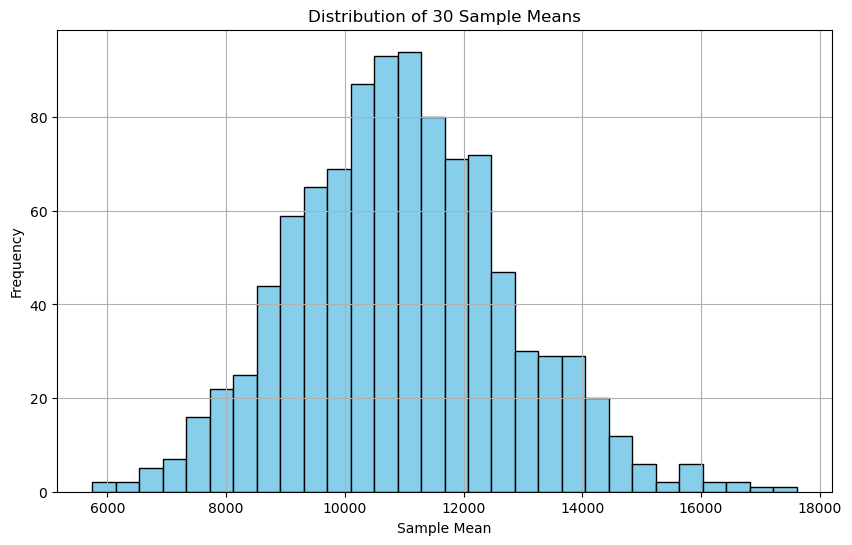

In [18]:
plt.figure(figsize=(10, 6))
plt.hist(meanofsamples[30], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 30 Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

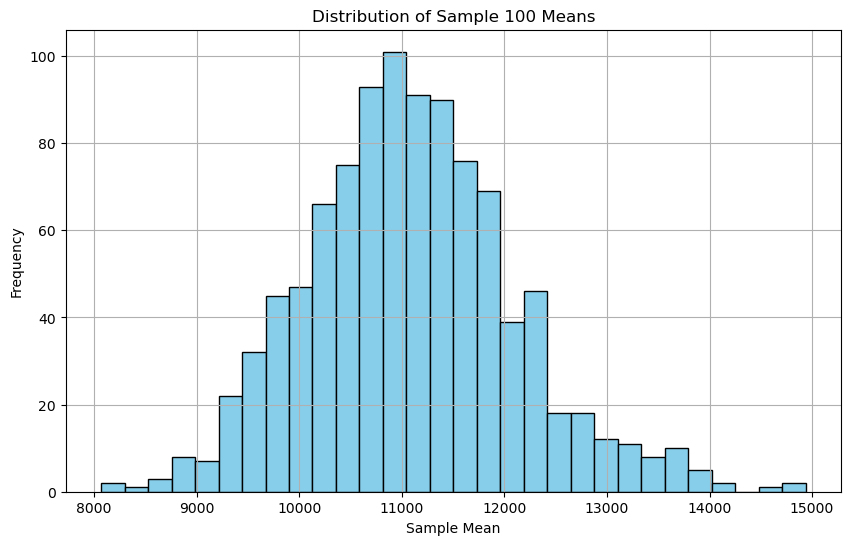

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(meanofsamples[100], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Sample 100 Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

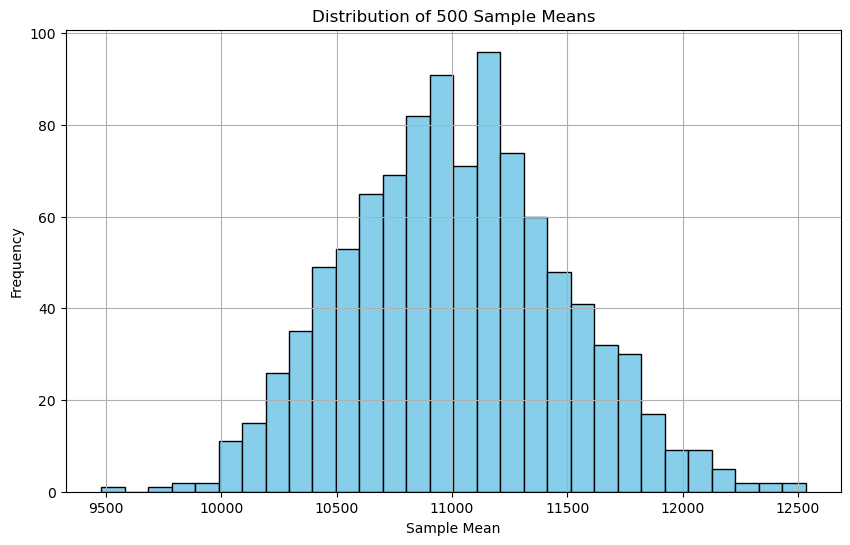

In [20]:
plt.figure(figsize=(10, 6))
plt.hist(meanofsamples[500], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 500 Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [21]:
population_std = new_listings['price'].std(ddof=0)
def theoretical_se(std, n):
    return std / np.sqrt(n)

In [22]:

for n in sample_sizes:
    empirical_se = np.std(meanofsamples[n], ddof=1)
    theoretical = theoretical_se(population_std, n)
    print(f"n = {n}")
    print(f"  Empirical SE:  {empirical_se:.2f}")
    print(f"  Theoretical SE: {theoretical:.2f}")

n = 30
  Empirical SE:  1819.12
  Theoretical SE: 1917.04
n = 50
  Empirical SE:  1481.16
  Theoretical SE: 1484.93
n = 100
  Empirical SE:  1021.42
  Theoretical SE: 1050.00
n = 200
  Empirical SE:  714.06
  Theoretical SE: 742.47
n = 500
  Empirical SE:  470.31
  Theoretical SE: 469.58


In [23]:
observed_stat = test_stat(new_listings)
replicates.append(observed_stat)
extreme_count = sum(abs(x) >= abs(observed_stat) for x in replicates)
p_value = extreme_count / len(replicates)

print(f"Observed statistic: {observed_stat}")
print(f"P-value: {p_value}")


Observed statistic: 3085.932630965526
P-value: 0.001


### Comparison

Discuss how the computational and CLT approaches align or diverge.
A: The P-value of .001 suggest that the observed statistic is significanly significant and the null can be rejected.  CLT works as expected with increase in data resulting in noralizng of distribtuion curve. SE compared to therotical SE aligns with normal-based inferece of the data  via  a z score or t test if required.

## Task 2

If this task is going to be a hypothesis test, briefly describe the hypothesis and dataset. If this task is going to be the calculation of an uncertainty, describe the metric and data. If this is the uncertainty calculation where you'll choose an additional metric other than the mean or a proportion, describe that metric as well.

### Computational Approach

Outline the resampling or permutation workflow you'll use. Craigslist listings across 12 Midwest cities | Uncertainty Estimation (CI) | Build 95% CIs for F-150 prices in each city by sampling within location (or using bootstrap) so students can compare price uncertainty geographically. |

In [11]:
listings
listings_f150 = listings[listings['model'] == 'f150']
listings_city = (listings_f150.groupby('location')['price']).mean().reset_index()
listings_city

,location,price
0,appleton,11665.062500
1,chicago,9264.033752
2,desmoines,12275.753289
3,duluth,13619.753205
4,fargo,12810.359091
5,grandrapids,10684.503378
6,kansascity,12117.301275
7,madison,10682.949254
8,milwaukee,8942.248311
9,minneapolis,10533.820574


In [13]:
bootstrape_df

,location,replicate,mean_price
0,appleton,0,11044.644531
1,appleton,1,11648.378906
2,appleton,2,11300.078125
3,appleton,3,10502.714844
4,appleton,4,12418.273438
...,...,...,...
11995,stlouis,995,11088.663057
11996,stlouis,996,10237.370638
11997,stlouis,997,10320.843562
11998,stlouis,998,10463.205776


In [14]:
ci_results = (
    bootstrape_df.groupby('location')['mean_price']
    .quantile([0.025, 0.975])
    .unstack()
    .rename(columns={0.025: 'ci_lower', 0.975: 'ci_upper'})
)

In [15]:
ci_results['estimate'] = listings_city.groupby('location')['price'].mean()
ci_results

,ci_lower,ci_upper,estimate
location,,,
appleton,10518.739941,12789.173145,11665.062500
chicago,8917.134332,9612.374073,9264.033752
desmoines,11164.243257,13393.701480,12275.753289
duluth,12247.664343,15098.976603,13619.753205
fargo,11445.531818,14404.608864,12810.359091
grandrapids,9661.322551,11762.546706,10684.503378
kansascity,11468.276535,12781.470481,12117.301275
madison,9723.056716,11650.831493,10682.949254
milwaukee,8446.962542,9510.607897,8942.248311


### CLT Approach

Summarize how you'll approximate the sampling distribution analytically (e.g., using SE formulas).
A:A: I will take 5 sampeles of different sizes, calculate the mean, and plot 3 of the distributions (smallest, middle, largest), and then I will calculate the SE and the therotical SE. 

In [19]:
sample_sizes = [30, 50, 100, 200, 500]
numberofsamples = 1000
meanofsamples = {}
for location, group in listings_f150.groupby("location"):
    meanofsamples[location] = {}
    
    for n in sample_sizes:
        sample_means = []
        for _ in range(numberofsamples):
            sample = group["price"].sample(n, replace=True)
            sample_means.append(sample.mean())
        meanofsamples[location][n] = sample_means


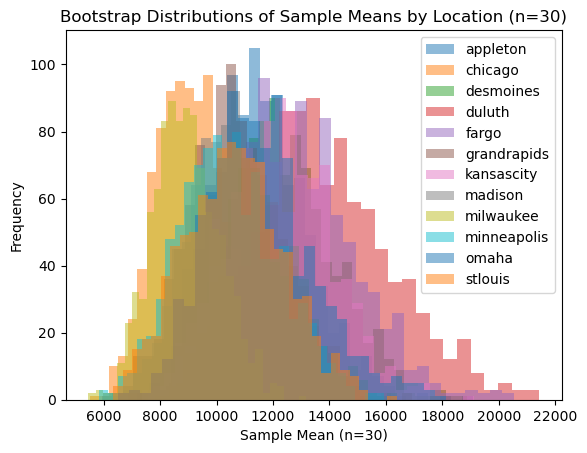

In [21]:
for location in meanofsamples.keys():
    plt.hist(meanofsamples[location][30], bins=30, alpha=0.5, label=location)

plt.xlabel("Sample Mean (n=30)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distributions of Sample Means by Location (n=30)")
plt.legend()
plt.show()



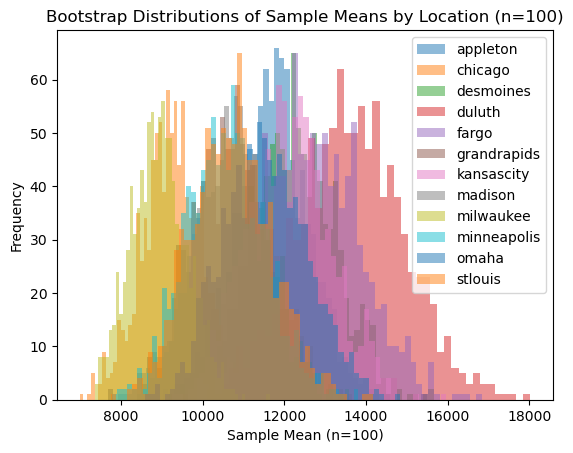

In [25]:
for location in meanofsamples.keys():
    plt.hist(meanofsamples[location][100], bins=50, alpha=0.5, label=location)

plt.xlabel("Sample Mean (n=100)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distributions of Sample Means by Location (n=100)")
plt.legend()
plt.show()

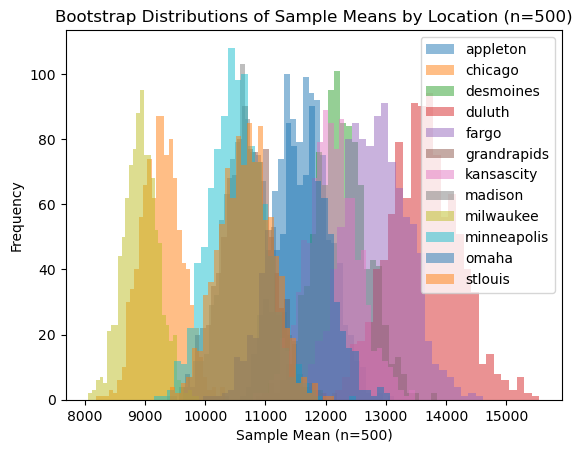

In [23]:
for location in meanofsamples.keys():
    plt.hist(meanofsamples[location][500], bins=30, alpha=0.5, label=location)

plt.xlabel("Sample Mean (n=500)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distributions of Sample Means by Location (n=500)")
plt.legend()
plt.show()

In [28]:
def theoretical_se(std, n):
    return std / np.sqrt(n)


In [29]:
for location, group in listings_f150.groupby("location"):
    print(f"\nLocation: {location}")
    
    loc_std = group["price"].std(ddof=0)
    
    for n in sample_sizes:
        bootstrap_se = np.std(meanofsamples[location][n], ddof=1)
        
        theory_se = theoretical_se(loc_std, n)
        
        print(f"n={n}: bootstrap SE={bootstrap_se:.2f}, theoretical SE={theory_se:.2f}")



Location: appleton
n=30: bootstrap SE=1661.63, theoretical SE=1638.13
n=50: bootstrap SE=1297.72, theoretical SE=1268.89
n=100: bootstrap SE=898.22, theoretical SE=897.24
n=200: bootstrap SE=616.33, theoretical SE=634.45
n=500: bootstrap SE=413.47, theoretical SE=401.26

Location: chicago
n=30: bootstrap SE=1389.00, theoretical SE=1379.45
n=50: bootstrap SE=1064.01, theoretical SE=1068.52
n=100: bootstrap SE=733.95, theoretical SE=755.56
n=200: bootstrap SE=542.55, theoretical SE=534.26
n=500: bootstrap SE=332.46, theoretical SE=337.90

Location: desmoines
n=30: bootstrap SE=1804.42, theoretical SE=1842.12
n=50: bootstrap SE=1431.57, theoretical SE=1426.90
n=100: bootstrap SE=992.01, theoretical SE=1008.97
n=200: bootstrap SE=718.73, theoretical SE=713.45
n=500: bootstrap SE=438.91, theoretical SE=451.23

Location: duluth
n=30: bootstrap SE=2472.26, theoretical SE=2440.57
n=50: bootstrap SE=1932.01, theoretical SE=1890.46
n=100: bootstrap SE=1308.31, theoretical SE=1336.76
n=200: boot

### Comparison

Discuss how the computational and CLT approaches align or diverge.
A:All the estimates fall within the 95% confindence interval which gives someone the ability to compare price uncertainty within geographic regions.  The simliarity in SE and therotical error demonstrate the CLT strength. The convergence of empirical and therotical SE confrims normal-based inferece of the data  via  a z score or t test.

## Task 3

If this task is going to be a hypothesis test, briefly describe the hypothesis and dataset. If this task is going to be the calculation of an uncertainty, describe the metric and data. If this is the uncertainty calculation where you'll choose an additional metric other than the mean or a proportion, describe that metric as well.

### Computational Approach

Outline the resampling or permutation workflow you'll use.Employee satisfaction survey with gender, tenure, location | Hypothesis Test | Test whether the chosen gender’s mean satisfaction differs from the combined other genders by shuffling gender labels to get a null distribution for the mean difference.

In [31]:
satisfaction

,employee_id,gender,location,tenure,satisfaction
0,AQ1600314,man,Seattle,0.9,4
1,AQ1808649,man,Seattle,4.3,4
2,AQ1850081,man,New York,1.2,4
3,AQ1929192,man,Seattle,1.5,4
4,AQ1238345,man,New York,NaN,4
...,...,...,...,...,...
295,AQ1186924,woman,Seattle,2.4,4
296,AQ1935626,woman,New York,2.0,5
297,AQ1744488,woman,Seattle,4.0,4
298,AQ1233041,woman,Seattle,1.3,2


In [35]:
satisfaction.value_counts('gender')

gender
man        181
woman      106
neither     10
Name: count, dtype: int64

In [43]:
#Test men vs all others
def test_stat1(df):
    Men_mean =  df[df['gender'] == 'man']['satisfaction'].mean()
    Other_mean = df[df['gender'].isin(['women', 'neither'])]['satisfaction'].mean()
    test_statatistic =  Men_mean - Other_mean
    return test_statatistic

In [61]:
obs = test_stat1(satisfaction)
obs

np.float64(0.9099447513812153)

In [46]:
#permutation test here
replicates = []
num_sim = 1000
#location_col = for_simulation['gender'].tolist()

for _ in range(num_sim-1) : 
    shuffled = np.random.permutation(satisfaction['gender'])
    df_perm = satisfaction.copy()
    df_perm['gender'] = shuffled
    test_statistic = test_stat1(df_perm)
    replicates.append (test_statistic)

In [47]:
replicates_df1 = pd.DataFrame({'replicates':replicates})
replicates_df1

,replicates
0,-0.011050
1,-0.094475
2,0.222099
3,-0.033149
4,-0.371823
...,...
994,-0.160773
995,0.028177
996,0.017127
997,-0.055249


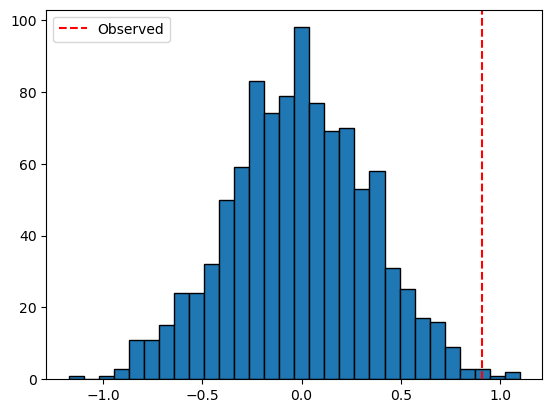

In [50]:
plt.hist(replicates_df1['replicates'], bins=30, edgecolor='black')
plt.axvline(obs, color='red', linestyle='--', label='Observed')
plt.legend()
plt.show()


### CLT Approach

Summarize how you'll approximate the sampling distribution analytically (e.g., using SE formulas).
I will take 5 sampeles of different sizes, calculate the mean, and plot 3 of the distributions (smallest, middle, largest), and then I will calculate the SE and the  therotical SE. I will then caluclate the P value. 

In [51]:
sample_sizes = [30, 50, 100, 200, 500]
numberofsamples = 1000
meanofsamples = {}
for n in sample_sizes:
    sample_means = []
    for _ in range(numberofsamples):
        sample = satisfaction["satisfaction"].sample(n, replace=True)
        sample_means.append(sample.mean())
    meanofsamples[n] = sample_means

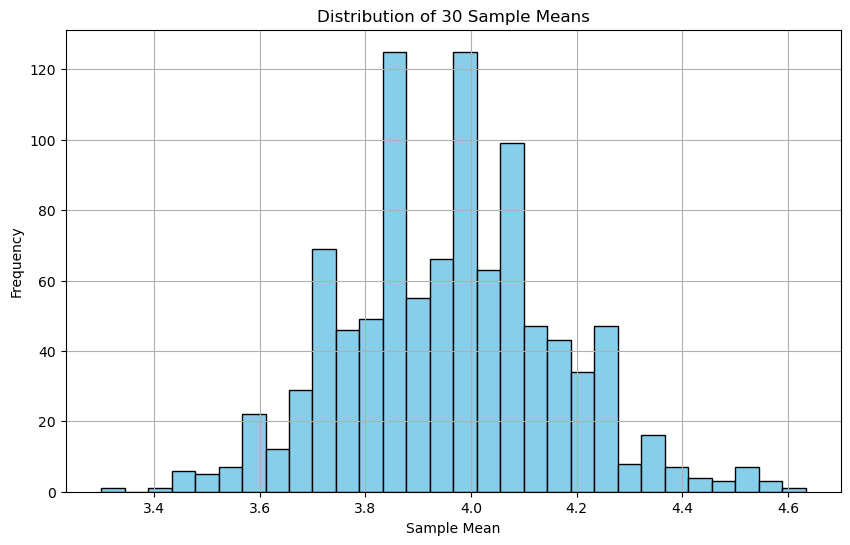

In [52]:
plt.figure(figsize=(10, 6))
plt.hist(meanofsamples[30], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 30 Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

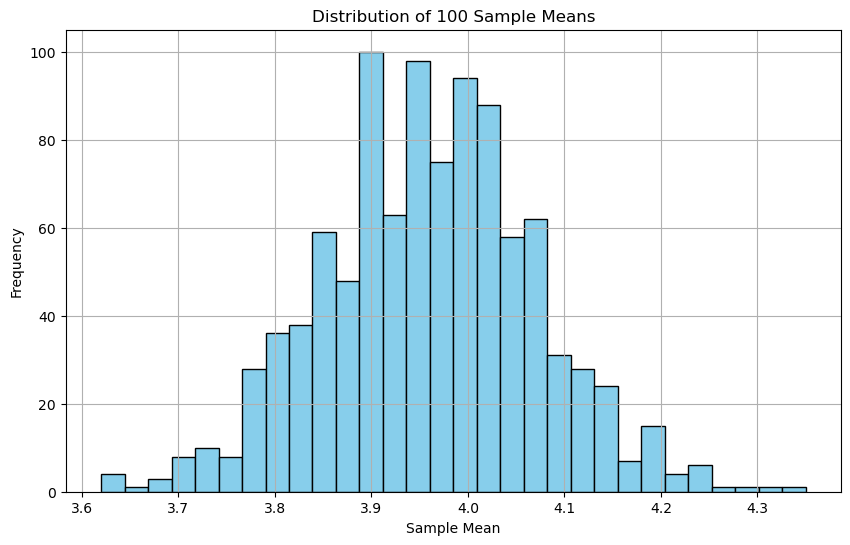

In [54]:
plt.figure(figsize=(10, 6))
plt.hist(meanofsamples[100], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 100 Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

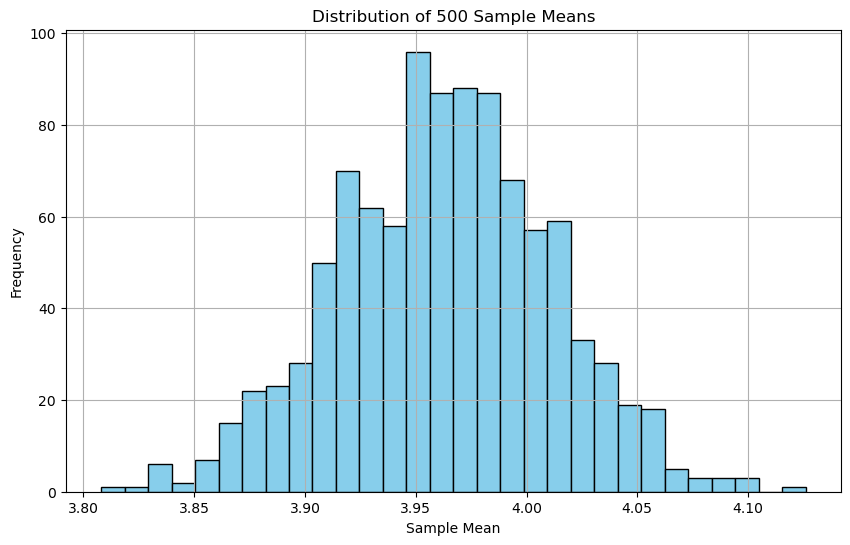

In [55]:
plt.figure(figsize=(10, 6))
plt.hist(meanofsamples[500], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 500 Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [58]:
population_std1 = satisfaction['satisfaction'].std(ddof=0)
def theoretical_se(std, n):
    return std / np.sqrt(n)

In [59]:
for n in sample_sizes:
    empirical_se = np.std(meanofsamples[n], ddof=1)
    theoretical = theoretical_se(population_std1, n)
    print(f"n = {n}")
    print(f"  Empirical SE:  {empirical_se:.2f}")
    print(f"  Theoretical SE: {theoretical:.2f}")

n = 30
  Empirical SE:  0.20
  Theoretical SE: 0.20
n = 50
  Empirical SE:  0.16
  Theoretical SE: 0.15
n = 100
  Empirical SE:  0.11
  Theoretical SE: 0.11
n = 200
  Empirical SE:  0.07
  Theoretical SE: 0.08
n = 500
  Empirical SE:  0.05
  Theoretical SE: 0.05


In [ ]:
observed_stat = test_stat1(satisfaction)

extreme_count = sum(abs(x) >= abs(observed_stat) for x in replicates)
p_value = extreme_count / len(replicates)

print(f"Observed statistic: {observed_stat}")
print(f"P-value: {p_value}")

Observed statistic: 0.9099447513812153
P-value: 0.011


### Comparison

Discuss how the computational and CLT approaches align or diverge.
A: The permutation test results suggest that the null can be rejected. The observed value is on the far right of the normlized distribution. The p value result is .011 which would reject the null suggesting that there is no difference between "man" and others related to satisfaction scores. The CLT approach works as expected and the empiical and theoretical SE are close even at only 30 samples which means a z score or t test would be reliable to draw inferences about the data. 

In [ ]:
# Your code he

## Task 4

If this task is going to be a hypothesis test, briefly describe the hypothesis and dataset. If this task is going to be the calculation of an uncertainty, describe the metric and data. If this is the uncertainty calculation where you'll choose an additional metric other than the mean or a proportion, describe that metric as well.

### Computational Approach

Outline the resampling or permutation workflow you'll use. Hypothesis Test | Compare the fraction of respondents with satisfaction > 4 for one gender versus others using a permutation test on the binary “satisfaction > 4” indicator.

In [69]:
sat = satisfaction
sat['satisfied'] = sat['satisfaction'] > 4
sat

,employee_id,gender,location,tenure,satisfaction,high_sat,satisfied
0,AQ1600314,man,Seattle,0.9,4,0,False
1,AQ1808649,man,Seattle,4.3,4,0,False
2,AQ1850081,man,New York,1.2,4,0,False
3,AQ1929192,man,Seattle,1.5,4,0,False
4,AQ1238345,man,New York,NaN,4,0,False
...,...,...,...,...,...,...,...
295,AQ1186924,woman,Seattle,2.4,4,0,False
296,AQ1935626,woman,New York,2.0,5,1,True
297,AQ1744488,woman,Seattle,4.0,4,0,False
298,AQ1233041,woman,Seattle,1.3,2,0,False


In [81]:
def fraction_satisfied(df):
    men_satisfied = df.loc[(df['satisfied'] == True) & (df['gender'] == 'man')]
    men_all = df.loc[(df['gender'] == 'man')]
    other_satisfied = df.loc[(df['satisfied'] == True) & (df['gender'].isin(['woman', 'neither']))]
    other_all =  df.loc[(df['gender'].isin (['woman', 'neither']))]
    man_frac = len(men_satisfied) / len(men_all) if len(men_all) > 0 else np.nan
    other_frac = len(other_satisfied) / len(other_all) if len(other_all) > 0 else np.nan
    diff = man_frac - other_frac
    return diff

In [82]:
fraction_satisfied(sat)

0.1891312630977329

In [83]:
#permutation test here
replicates = []
num_sim = 1000

for _ in range(num_sim-1) : 
    shuffled = np.random.permutation(sat['gender'])
    df_perm = satisfaction.copy()
    df_perm['gender'] = shuffled
    test_statistic = fraction_satisfied(df_perm)
    replicates.append (test_statistic)

In [84]:
replicates = pd.DataFrame({'replicates':replicates})

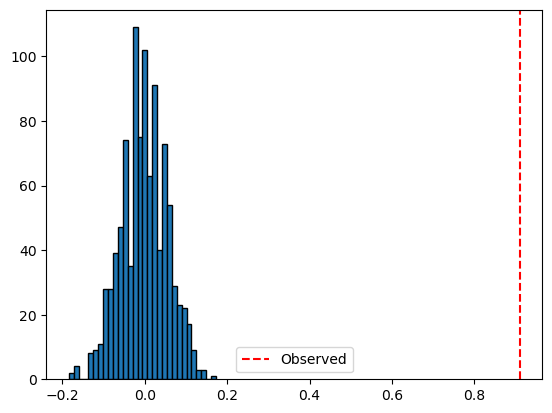

In [86]:
plt.hist(replicates['replicates'], bins=30, edgecolor='black')
plt.axvline(obs, color='red', linestyle='--', label='Observed')
plt.legend()
plt.show()

### CLT Approach

Summarize how you'll approximate the sampling distribution analytically (e.g., using SE formulas).
A:I will take 5 samples of different sizes, calculate the mean, and plot 3 of the distributions (smallest, middle, largest), and then I will calculate the SE and the  therotical SE. I will then caluclate the P value. 

In [87]:
sample_sizes = [30, 50, 100, 200, 500]
numberofsamples = 1000
meanofsamples = {}
for n in sample_sizes:
    sample_means = []
    for _ in range(numberofsamples):
        sample = sat["satisfaction"].sample(n, replace=True)
        sample_means.append(sample.mean())
    meanofsamples[n] = sample_means

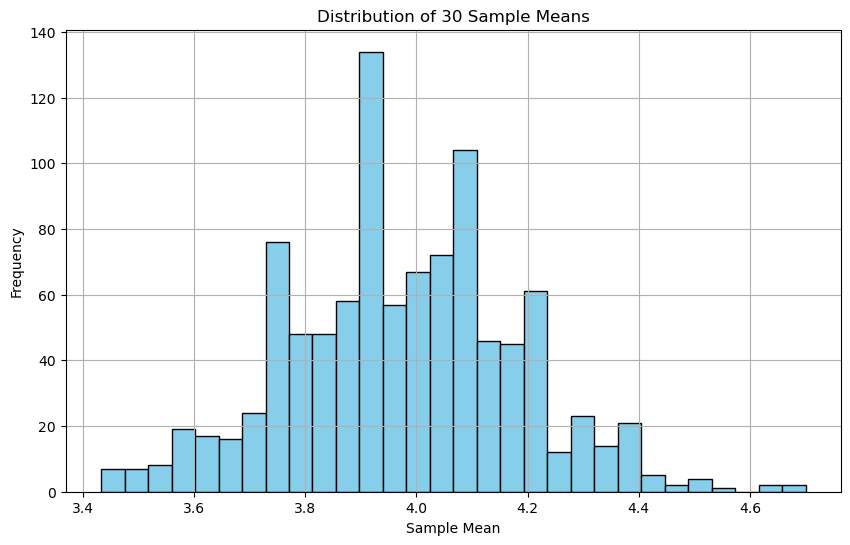

In [88]:
plt.figure(figsize=(10, 6))
plt.hist(meanofsamples[30], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 30 Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

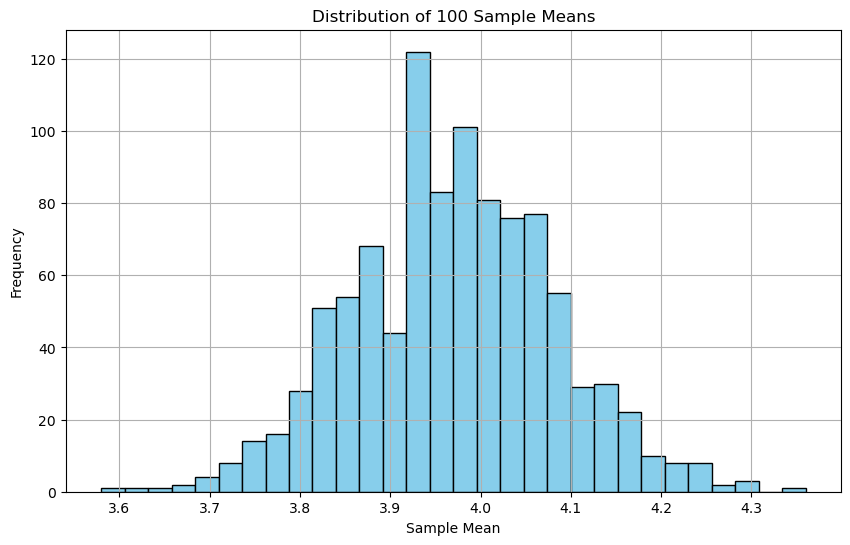

In [89]:
plt.figure(figsize=(10, 6))
plt.hist(meanofsamples[100], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 100 Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

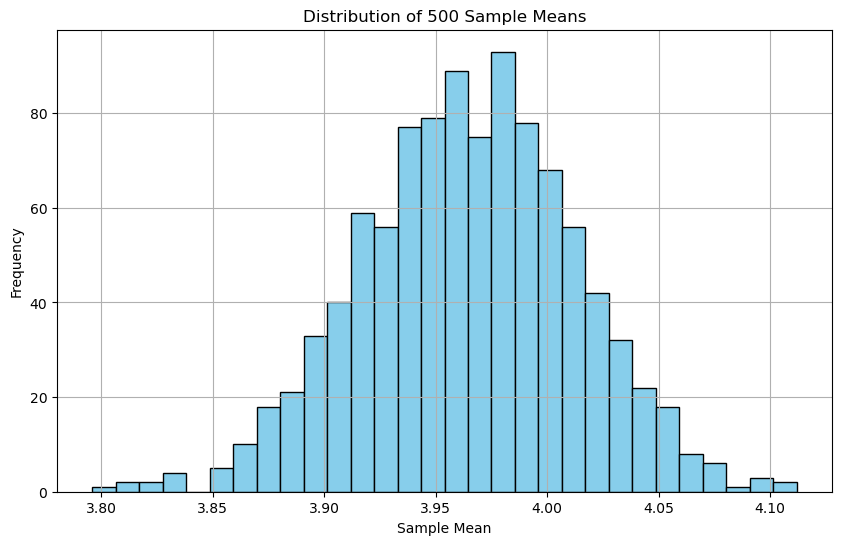

In [90]:
plt.figure(figsize=(10, 6))
plt.hist(meanofsamples[500], bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of 500 Sample Means")
plt.xlabel("Sample Mean")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [91]:
population_std2 = satisfaction['satisfaction'].std(ddof=0)
def theoretical_se(std, n):
    return std / np.sqrt(n)

In [92]:
for n in sample_sizes:
    empirical_se = np.std(meanofsamples[n], ddof=1)
    theoretical = theoretical_se(population_std1, n)
    print(f"n = {n}")
    print(f"  Empirical SE:  {empirical_se:.2f}")
    print(f"  Theoretical SE: {theoretical:.2f}")

n = 30
  Empirical SE:  0.21
  Theoretical SE: 0.20
n = 50
  Empirical SE:  0.16
  Theoretical SE: 0.15
n = 100
  Empirical SE:  0.11
  Theoretical SE: 0.11
n = 200
  Empirical SE:  0.08
  Theoretical SE: 0.08
n = 500
  Empirical SE:  0.05
  Theoretical SE: 0.05


In [98]:
observed_stat = fraction_satisfied(sat)
replicates = np.array(replicates, dtype=float)


extreme_count = sum(abs(x) >= abs(observed_stat) for x in replicates)
p_value = extreme_count / len(replicates)

print(f"Observed statistic: {observed_stat}")
print(f"P-value: {p_value}")

Observed statistic: 0.1891312630977329
P-value: [0.]


### Comparison

Discuss how the computational and CLT approaches align or diverge.
A:The permutation test results suggest that the null can be rejected. The observed value is far off to the right of the most right tail in the distribution. The p value is 0 which indicateds in 1000 permutations I returned 0 values as extreme as the observed statstic. This agrees with the graphic that is provided. The CLT works as expected but I am very unsure if I did it correctly. 

In [ ]:
# Your code here

## Task 5

If this task is going to be a hypothesis test, briefly describe the hypothesis and dataset. If this task is going to be the calculation of an uncertainty, describe the metric and data. If this is the uncertainty calculation where you'll choose an additional metric other than the mean or a proportion, describe that metric as well.  

### Computational Approach

Outline the resampling or permutation workflow you'll use.Uncertainty Estimation (CI) | Generate bootstrap CIs for mean satisfaction within each gender group to quantify uncertainty around the observed differences.

In [ ]:
men_sat  = satisfaction[satisfaction['gender'] == 'man']
women_sat   = satisfaction[satisfaction['gender']== 'woman']
other_sat = satisfaction[satisfaction['gender'] == 'neither']



,employee_id,gender,location,tenure,satisfaction,high_sat,satisfied
0,AQ1600314,man,Seattle,0.9,4,0,False
1,AQ1808649,man,Seattle,4.3,4,0,False
2,AQ1850081,man,New York,1.2,4,0,False
3,AQ1929192,man,Seattle,1.5,4,0,False
4,AQ1238345,man,New York,NaN,4,0,False
...,...,...,...,...,...,...,...
177,AQ1877092,man,New York,0.4,4,0,False
178,AQ1772848,man,New York,3.1,4,0,False
179,AQ1302339,man,Seattle,1.6,5,1,True
180,AQ1196552,man,Seattle,1.3,5,1,True


In [117]:
#code to get 1000 of each gender bootstrapped data
num_replicates = 1000
bootstrape_results = []
#For each gender and its mean satisfaction
for gender, subset in satisfaction.groupby('gender'):
    sat = subset['satisfaction'].dropna().values
    n = len(sat)

    for i in range(num_replicates):
        bootstrap_sample = np.random.choice(sat, size=n, replace=True)
        median_sat = np.median(bootstrap_sample)
        bootstrape_results.append({
            'gender': gender,
            'replicate': i,
            'median_sat': median_sat
        })

bootstrape_df1 = pd.DataFrame(bootstrape_results)
bootstrape_df1

,gender,replicate,median_sat
0,man,0,4.0
1,man,1,4.0
2,man,2,4.0
3,man,3,4.0
4,man,4,4.0
...,...,...,...
2995,woman,995,4.0
2996,woman,996,4.0
2997,woman,997,4.0
2998,woman,998,3.0


In [119]:
ci_results = (
    bootstrape_df1.groupby('gender')['median_sat']
    .quantile([0.025, 0.975])
    .unstack()
    .rename(columns={0.025: 'ci_lower', 0.975: 'ci_upper'}))


In [120]:
ci_results['estimate'] = satisfaction.groupby('gender')['satisfaction'].median()
ci_results

,ci_lower,ci_upper,estimate
gender,,,
man,4.0,4.0,4.0
neither,3.0,4.0,3.0
woman,3.0,4.0,4.0


### CLT Approach

Summarize how you'll approximate the sampling distribution analytically (e.g., using SE formulas).
A:A: I will take 5 samples of different sizes, calculate the median, and plot 3 of the distributions (smallest, middle, largest), and then I will calculate the SE and the therotical SE. 

In [123]:
sample_sizes = [30, 50, 100, 200, 500]
numberofsamples = 1000
medianofsamples = {}
for gender, group in satisfaction.groupby("gender"):
    medianofsamples[gender] = {}   #
    
    sat = group["satisfaction"].dropna()  
    
    for n in sample_sizes:
        sample_medians = []
        for _ in range(numberofsamples):
            sample = sat.sample(n, replace=True)
            sample_medians.append(sample.median())
        medianofsamples[gender][n] = sample_medians


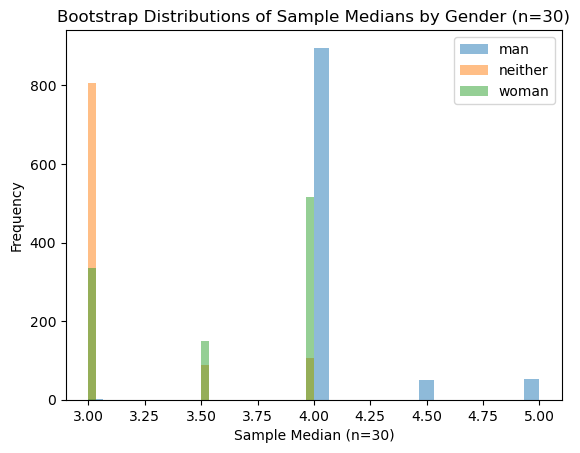

In [127]:
for gender in medianofsamples.keys():
    plt.hist(medianofsamples[gender][30], bins=30, alpha=0.5, label=gender)

plt.xlabel("Sample Median (n=30)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distributions of Sample Medians by Gender (n=30)")
plt.legend()
plt.show()


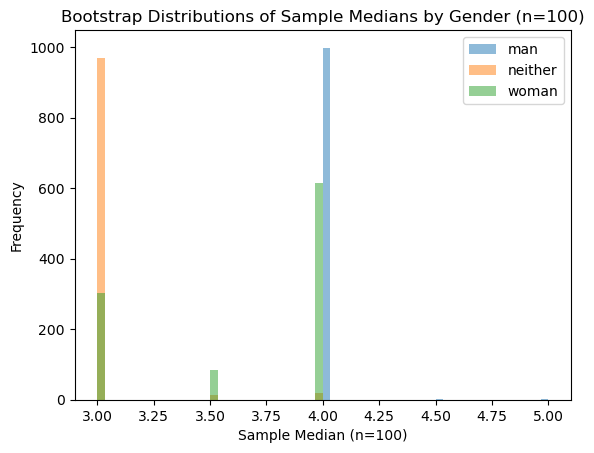

In [128]:
for gender in medianofsamples.keys():
    plt.hist(medianofsamples[gender][100], bins=30, alpha=0.5, label=gender)

plt.xlabel("Sample Median (n=100)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distributions of Sample Medians by Gender (n=100)")
plt.legend()
plt.show()

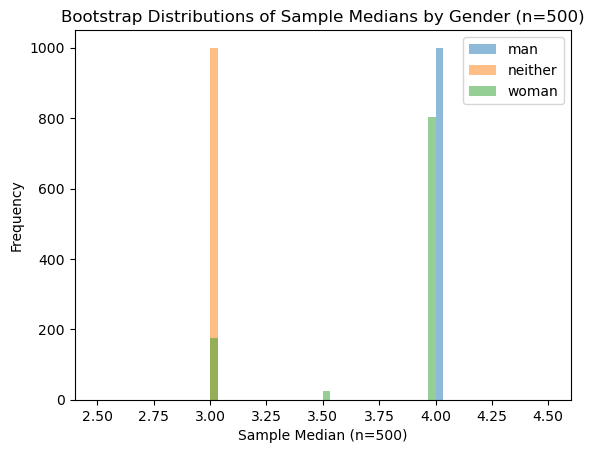

In [129]:
for gender in medianofsamples.keys():
    plt.hist(medianofsamples[gender][500], bins=30, alpha=0.5, label=gender)

plt.xlabel("Sample Median (n=500)")
plt.ylabel("Frequency")
plt.title("Bootstrap Distributions of Sample Medians by Gender (n=500)")
plt.legend()
plt.show()

In [130]:
def theoretical_se(std, n):
    return std / np.sqrt(n)

In [133]:
for gender, group in satisfaction.groupby("gender"):
    print(f"\ngender: {gender}")
    
    satisfaction_std = group["satisfaction"].std(ddof=0)  
    
    for n in sample_sizes:
        bootstrap_se = np.std(medianofsamples[gender][n], ddof=1)
        theory_se = theoretical_se(satisfaction_std, n)
        
        print(f"n={n}: bootstrap SE={bootstrap_se:.2f}, theoretical SE={theory_se:.2f}")



gender: man
n=30: bootstrap SE=0.25, theoretical SE=0.20
n=50: bootstrap SE=0.18, theoretical SE=0.15
n=100: bootstrap SE=0.04, theoretical SE=0.11
n=200: bootstrap SE=0.00, theoretical SE=0.08
n=500: bootstrap SE=0.00, theoretical SE=0.05

gender: neither
n=30: bootstrap SE=0.33, theoretical SE=0.12
n=50: bootstrap SE=0.24, theoretical SE=0.09
n=100: bootstrap SE=0.14, theoretical SE=0.06
n=200: bootstrap SE=0.05, theoretical SE=0.05
n=500: bootstrap SE=0.00, theoretical SE=0.03

gender: woman
n=30: bootstrap SE=0.45, theoretical SE=0.19
n=50: bootstrap SE=0.46, theoretical SE=0.14
n=100: bootstrap SE=0.45, theoretical SE=0.10
n=200: bootstrap SE=0.44, theoretical SE=0.07
n=500: bootstrap SE=0.38, theoretical SE=0.05


### Comparison

Discuss how the computational and CLT approaches align or diverge.

For this task I decided to use the median for my statatitic. While I believe I coded every thing correctly, using median for a CI test lead to pretty bland results. Even with purmutation, as there were only 1-4 numbers for satisfaction to pick from, median really dulled the test. All estimation fell within the CI.  CI graphics and analytical value were also effected by low number count(1-4 of satisfactoin) and utlization of the median for a statistic. The simliarity in SE and therotical error demonstrate the CLT strength. The convergence of empirical and therotical SE confrims normal-based inferece of the data  via  a z score or t test.

## Reflection

- Having done these analyses in two ways, what are your thoughts on the process?
- It's Prof. Chandler's contention that doing computational approaches is better because it gues you in touch with the details of the null hypothesis and where the p-value comes from. How does it seem to you? (To be clear, feel _free_ to disagree with me!)
- To what extent did you find an interesting additional metric to do bootstrapping on? In other words, for the metric you chose that _wasn't_ a proportion or mean, is that metric interesting? If it is, say why and tell me how hard it was to come up with. If not, tell me why it was hard for you to come up with a metric that was intrinsically interesting. 


#### Write your reflection below here



1) I felt that the process and coding was overall smooth. The part I struggled with was connecting the permutation to the results of the CLT work. I also THINK I did everything I needed to do but the directions were slightly confusing. 
2)I believe that it is a good approach. I would like to learn more about connecting the CLT coding application to rejecting or failing to reject the null. I was a bit unclear on that part. 
3) I choose to use median, but it was uninteresting. It was actually a poor option for looking at results that were only 1-4. It was not hard to come up with the metric, but I thought it would provide a different look at the data. In retrospect, I would only use median when there is a larger number of outcomes(much higher amount of numbers) when selecting an alternative statistic. 
